## 지그재그의 데이터분석 팀에 오신 것을 환영합니다!



<img src ="https://i.imgur.com/9zb1Cdh.jpg" width=700>

(이 쥬피터 노트북은 다음의 링크 http://bit.ly/dsa-0302-ipynb 데이터는 http://bit.ly/dsa-03-zigzag 에서 다운받을 수 있습니다.)
  
안녕하세요! [지그재그](https://zigzag.kr/) 데이터분석팀에 오신 것을 환영합니다.

지그재그는 여성 패션 쇼핑몰들의 상품 정보를 통합적으로 제공하는 플랫폼으로 개인 취향 알고리즘을 통해 적절한 제품을 추천하여 유저 경험을 높이고 있습니다. 지그재그는 2015년 6월 ‘내 스타일의 쇼핑몰을 편하게 북마크 해보자’라는 작은 아이디어에서 시작했습니다. 서비스가 출시되고 3년이 지난 지금, 지그재그에 입점한 2,700여 개의 온라인 쇼핑몰들에서는 하루에 10,000여 개의 패션 아이템이 업데이트되며 한 달에 200만 명이 넘는 사용자들이 방문해 자신이 좋아하는 상품을 실시간으로 발견하고 있습니다. 런칭 2년 반 만에 1,000만 앱 다운로드를 돌파하며 대한민국 여성의 쇼핑 필수 앱으로 자리 잡았습니다.


<img src = "https://i.imgur.com/chOEQhY.jpg" width=250>

 오늘 이 쥬피터 노트북을 받은 수강생분들께서는 지그재그의 일일 데이터 분석가(Data Analyst)로서 일을 할 것입니다. 지그재그의 하루 동안의 로그 데이터를 바탕으로 매출 분석 등 기본적인 데이터 탐색을 할 예정입니다. 일반적으로 매출 또는 핵심 지표에 영향을 미치는 요인에 대한 가설을 세우고 이를 데이터로 검증하는 일이 일반적인 데이터 분석이지만, 때로는 가설 없이 데이터 그 자체를 이해하는 것부터 출발하여 역으로 핵심 지표 또는 매출 등을 개선하기 위한 아이디어를 얻을 수도 있습니다. 이러한 데이터 자체를 이해하는 과정을 탐색적 자료 분석이라고 합니다. 여러분들은 6월 11일에 활동한 고객 정보, 쇼핑몰 정보, 거래 정보, 상품 정보, 그리고 고객의 행동 정보를 이해하고 분석하여 다른 팀들과 정보를 공유하게 될 것입니다.


---

## *set options

In [76]:
import pandas as pd

In [77]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

**1. data 폴더의 zigzag_DB.db에 연결한 뒤 데이터베이스 스키마를 출력해주세요. 그 다음,  order 테이블을 불러와주세요.**

zigzag 데이터 테이블들을 모두 zigzag_DB.db 파일에 저장해두었습니다. 저번 주 수업자료를 참고해 database를 조회하고 그 중, order 테이블을 불러와주세요.

로드한 테이블이 다음과 같은 모양이어야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
    </tr>
  </tbody>
</table>

In [78]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd
import sqlite3

In [79]:
#Write your code here!

connect = sqlite3.connect("data/zigzag/zigzag_DB.db")
connect

In [80]:
query = "SELECT * FROM sqlite_master"

schema = pd.read_sql(query, connect)
schema

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


In [81]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connect)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [82]:
order.tail()

,timestamp,user_id,goods_id,shop_id,price
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900
866,2018-06-11 23:57:47.896,6xq2ibp39i7HaiTt_dOwWfpMC5UlFLhJ,1659,22,19000


order 테이블의 각 행은 주문이 일어난 로그를 나타내며, 2018년 6월 11일 하루치 데이터가 주어졌습니다.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냅니다.

**2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구해주세요.**

order 테이블을 이용해 지그재그를 통해 이루어진 6월 11일의 쇼핑몰별 매출 정보를 피벗 테이블을 이용하여 구해주세요. 결과는 다음과 같이 나와야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>price</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
    </tr>
  </tbody>
</table>

In [83]:
#Write your code here!
table = pd.pivot_table(data=order, index="shop_id",values="price",aggfunc="sum")
table.sort_values(by="price", ascending=False).head()

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400


**3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.**

같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있습니다.

매출과 결제 건수를 함께 볼 수 있는 피벗테이블을 작성해주세요. 그리고, 그 결과를 막대그래프로 시각화하여 보여주세요. 결과는 다음과 같이 나오게됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sum</th>
      <th>count</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
      <td>99</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
      <td>30</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
      <td>27</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
      <td>37</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
      <td>39</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
      <td>24</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
      <td>19</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
      <td>23</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
      <td>19</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
      <td>42</td>
    </tr>
  </tbody>
</table>

![](https://i.imgur.com/T6VRYf6.png)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
#Write your code here!
table = pd.pivot_table(data=order, index="shop_id",values="price",aggfunc=["sum","count"])
table.columns=["sum","count"]
table = table.sort_values(by="sum",ascending=False).head(10)

## table visualization

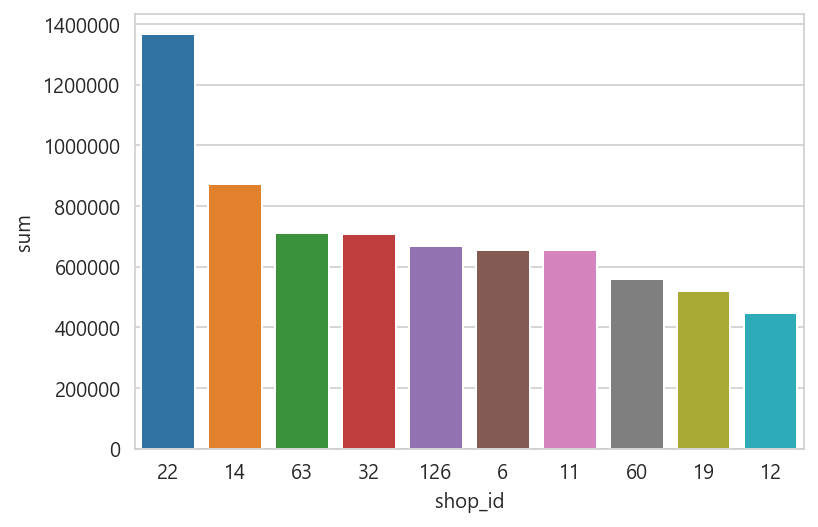

In [86]:
sns.barplot(data=table, x = table.index, y="sum", order = table.index)

**4. 시간대별 지그재그 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.**

지그재그 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 to_datetime을 이용하여 datetime 자료형으로 만든 뒤, 이를 이용하여 시간대별 총 매출량을 구해주세요.

x를 timestamp, y를 price로 놓는 경우 다음과 같은 그래프가 나오게 됩니다. 

![](https://i.imgur.com/5cqEAAj.png)

In [87]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.

mpl.rc('font', family='Malgun Gothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [88]:
#Write your code here!
order["timestamp"] = pd.to_datetime(order["timestamp"])
order["timestamp"]

0     2018-06-11 00:00:43.032
1     2018-06-11 00:02:33.763
2     2018-06-11 00:04:06.364
3     2018-06-11 00:04:17.258
4     2018-06-11 00:05:26.010
                ...          
862   2018-06-11 23:47:02.003
863   2018-06-11 23:50:42.202
864   2018-06-11 23:51:54.449
865   2018-06-11 23:54:11.765
866   2018-06-11 23:57:47.896
Name: timestamp, Length: 867, dtype: datetime64[ns]

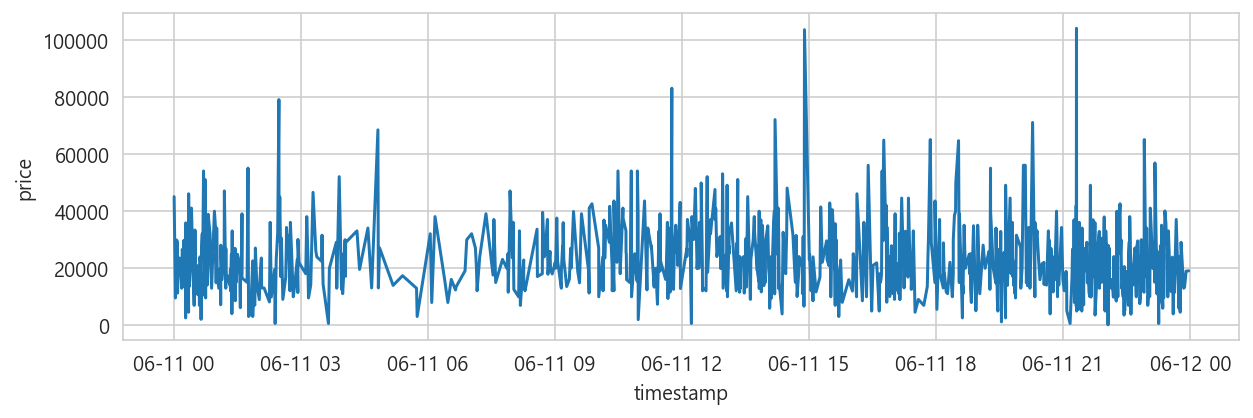

In [89]:
plt.figure(figsize=(10,3))
sns.lineplot(data = order, x="timestamp", y = "price")

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.**

위의 시각화는 적절하지 못한 시각화입니다. 정확하게는 x시 00분 ~ x시 59분 까지의 매출을 시간대별로 모두 합하는 binning 과정을 거친 뒤 시각화를 진행해야 원하는 결과를 얻을 수 있습니다.

order 테이블에 로그의 발생 시간을 나타내는 hour 칼럼을 추가한 뒤, pivot_table을 이용하여 시간대별 매출을 구해주세요. 그리고, 이를 이용해 아래와 같은 그래프를 만들어 주세요.

*lineplot을 사용하는 경우*
![](https://i.imgur.com/sGVLJKi.png)

*pointplot을 사용하는 경우*
![](https://i.imgur.com/hYuKVqE.png)

In [90]:
#Write your code here!
# binning -> 시간을 먼저 추출하여 hour 컬럼에 넣어준다. 
# pivot_table로 시간대별 매출을 sum 하여 나타낸다. 

order["hour"] = order["timestamp"].dt.hour
order["hour"].head()

0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int64

In [91]:
hour_table = pd.pivot_table(data=order, index="hour",values="price", aggfunc="sum")
hour_table.head(2)

,price
hour,
0,1479210
1,990300


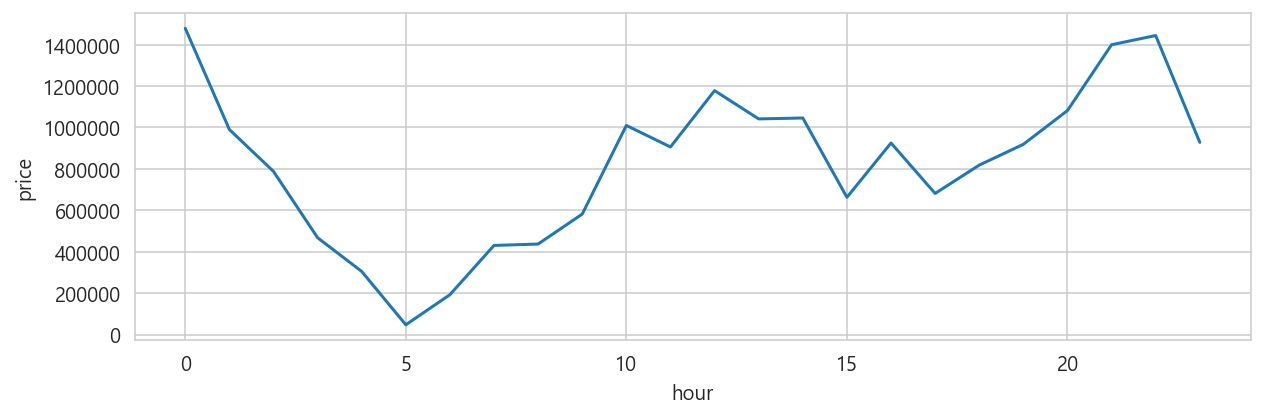

In [92]:
#lineplot
plt.figure(figsize=(10,3))
sns.lineplot(data=hour_table, x=hour_table.index, y="price")

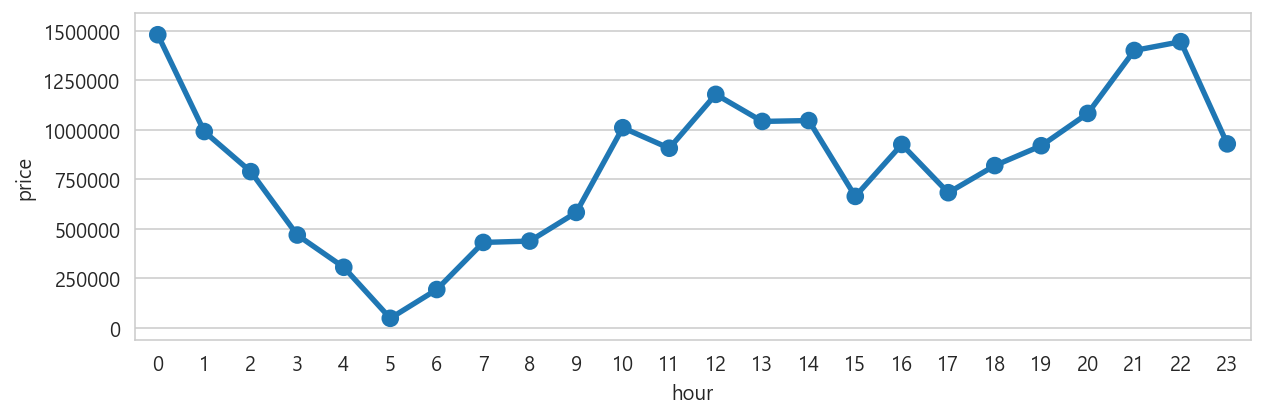

In [93]:
#pointplot
plt.figure(figsize=(10,3))
sns.pointplot(data=hour_table, x=hour_table.index, y="price")

**6 . user 테이블을 불러와 order 테이블과 병합해주세요.**

user 테이블에는 고객의 고유 아이디를 나타내는 user_id, 그리고 접속 기기정보를 나타내는 os, 그리고 나이정보 age가 있습니다. 이를 이용해 top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석하고자 합니다. 데이터베이스에서 user 테이블을 불러온 뒤, order 테이블과 병합해주세요.

병합 결과는 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
      <td>0</td>
      <td>And</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
      <td>0</td>
      <td>And</td>
      <td>34</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
  </tbody>
</table>

In [94]:
#Write your code here!
query = "SELECT * FROM 'user'"

user = pd.read_sql(query, connect)
user.head()

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [95]:
merge_table = order.merge(user,how="inner",on="user_id")
merge_table.shape

(867, 8)

**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현하고자 합니다. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화를 해야 합니다. 시각화 결과가 아래의 둘 중 하나가 나오게 해주세요.

![](https://i.imgur.com/roHlnXi.png)

In [96]:
#Write your code here!

table = pd.pivot_table(data=order, index="shop_id",values="price",aggfunc=["sum","count"])
table.columns=["sum","count"]
table_top10 = table.sort_values(by="sum",ascending=False).head(10)
table_top10

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [97]:
merge_top10 = merge_table[merge_table["shop_id"].isin(table_top10.index) & (merge_table["age"] != -1)]
print(merge_top10.shape)
merge_top10.head()

(347, 8)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,0,iOS,21
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,0,iOS,22
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,0,iOS,24
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,0,And,27


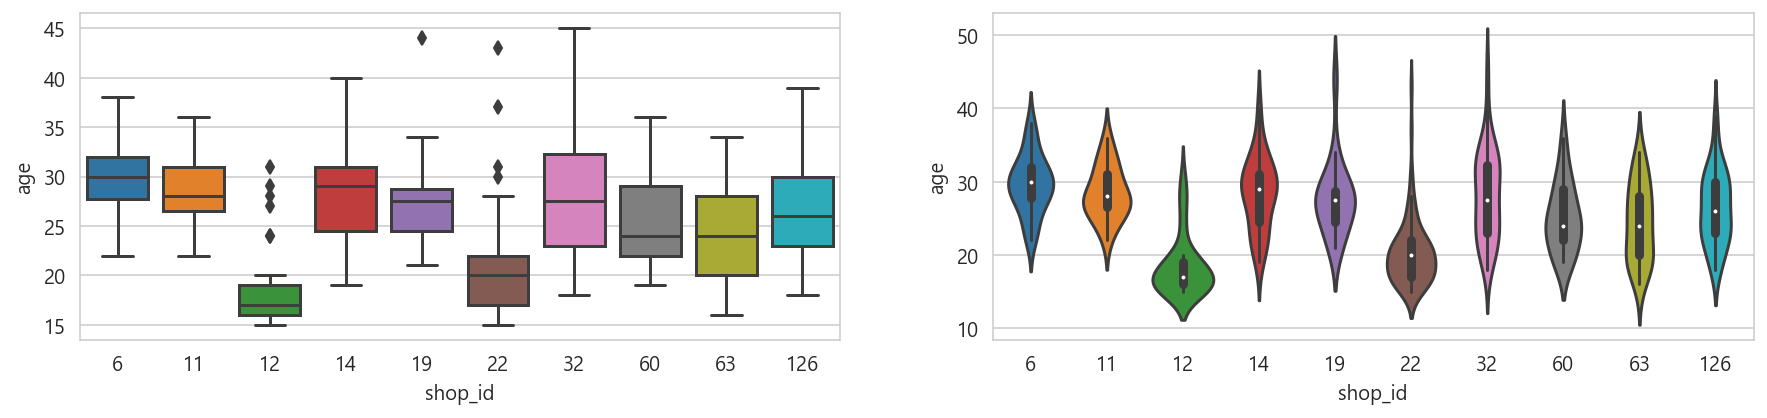

In [98]:
# subplot으로 그릴 때, 지정해주지 않으면 무조건 마지막 subplot에 그리게 된다. 
# ax 파라미터를 이용해서 지정해준다. 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,3)
sns.boxplot(data=merge_top10, x="shop_id", y="age", ax=ax1)
sns.violinplot(data=merge_top10, x="shop_id", y="age", ax=ax2)

**8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증해주세요.**

지그재그의 쇼핑몰들은 아래의 필터에서 보여지는 것과 같이 타겟 연령대를 가지고 있습니다. 하지만, 실제 구매가 설정되어 있는 타겟 연령대에 맞게 이루어지는지 꾸준히 검증이 이루어져야 합니다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험 (UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이기 때문입니다.

<img src="https://i.imgur.com/HMd9xC2.jpg" width=300>

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

아래의 함수를 이용해 user 테이블에 연령대를 만들어주세요.

In [99]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [100]:
#Write your code here!
user["연령대"] = user["age"].apply(make_generation)
user["연령대"].head()

0    30대 후반
1    30대 초반
2       10대
3    30대 후반
4    30대 후반
Name: 연령대, dtype: object

shop 테이블을 DB에서 불러와 주세요. 그 다음, user, order 테이블과 병합해주세요.

병합 결과는 다음과 같게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age_x</th>
      <th>연령대</th>
      <th>name</th>
      <th>category</th>
      <th>age_y</th>
      <th>style</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 07:33:39.823</td>
      <td>ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL</td>
      <td>2278</td>
      <td>38</td>
      <td>37000</td>
      <td>7</td>
      <td>And</td>
      <td>32</td>
      <td>30대 초반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 12:56:27.867</td>
      <td>MnvhmV0tA89bN9TLXgRTbLza689bTkT9</td>
      <td>5513</td>
      <td>38</td>
      <td>31000</td>
      <td>12</td>
      <td>And</td>
      <td>37</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 22:57:11.582</td>
      <td>3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB</td>
      <td>7026</td>
      <td>38</td>
      <td>17100</td>
      <td>22</td>
      <td>iOS</td>
      <td>34</td>
      <td>30대 중반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
      <td>10대 후반</td>
      <td>Rachel</td>
      <td>의류</td>
      <td>10대/20대 초반</td>
      <td>러블리/심플베이직</td>
    </tr>
  </tbody>
</table>

In [101]:
query = "SELECT * FROM 'shop'"
shop = pd.read_sql(query, connect)
print(shop.shape)
shop.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [102]:
merge_table = order.merge(user, on="user_id").merge(shop, on="shop_id")

print(merge_table.shape)
merge_table.head()

(867, 13)


,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


병합한 테이블을 이용하여 '거래연령 일치여부' 칼럼을 아래의 칼럼을 이용하여 만들어 주세요. 각 열이 아닌 각 행에 함수를 적용할 때는 `apply(function, axis=1)`을 이용해야 합니다.

In [103]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [104]:
merge_table["거래연령 일치여부"] = merge_table.apply(check_generation,axis=1)
merge_table

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2018-06-11 22:20:34.998,uCEatnbV_pxTXOLiLRpFTjNrEdZEIdSj,3820,122,42500,22,And,32,30대 초반,Leah,빅사이즈,None,모던시크,False
863,2018-06-11 22:22:51.411,ect22jSDV9GkEmmP9ft6GC059RpGJ2lg,1829,16,12900,22,And,45,30대 후반,Elizabeth,의류,30대 초반/30대 중반/30대 후반,심플베이직/미시스타일,True
864,2018-06-11 23:08:48.985,svMlM7AAM3U4gy1Pk58jLgb3Gqyz2sNI,7102,47,29000,23,iOS,32,30대 초반,Katrina,빅사이즈,None,미시스타일,False
865,2018-06-11 23:34:39.923,VdxINSPDmWqar5NUJJTFjxC_cF0IOfFe,5113,181,23800,23,iOS,-1,미입력,Bertha,의류,20대 초반/20대 중반/20대 후반,심플베이직/러블리,True


피벗 테이블을 이용한 결과가 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.666667</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.937500</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.400000</td>
      <td>5</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.000000</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.000000</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

In [105]:
#Write your code here!
pd.pivot_table(merge_table, index="shop_id", values=['거래연령 일치여부'], aggfunc=["mean","count"])

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1
6,0.750000,24
7,1.000000,1
8,1.000000,1


위의 정보를 Top 10 쇼핑몰에 대해 뽑아보면 다음과 같은 결과가 나옵니다. 

`table[table.index.isin(top10_index)]`

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>0.750000</td>
      <td>24</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.684211</td>
      <td>19</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.857143</td>
      <td>42</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.566667</td>
      <td>30</td>
    </tr>
    <tr>
      <th>19</th>
      <td>0.789474</td>
      <td>19</td>
    </tr>
    <tr>
      <th>22</th>
      <td>0.929293</td>
      <td>99</td>
    </tr>
    <tr>
      <th>32</th>
      <td>0.540541</td>
      <td>37</td>
    </tr>
    <tr>
      <th>60</th>
      <td>0.695652</td>
      <td>23</td>
    </tr>
    <tr>
      <th>63</th>
      <td>0.000000</td>
      <td>27</td>
    </tr>
    <tr>
      <th>126</th>
      <td>0.000000</td>
      <td>39</td>
    </tr>
  </tbody>
</table>

의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

**9. 쇼핑몰의 스타일 태그를 정리해주세요.**

쇼핑몰별로 제품군의 스타일을 나타낼 수 있는 태그를 가지고 있습니다. 이 태그는 다음의 리스트에 정리되어 있습니다.

In [106]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

위의 스타일을 정리하여 shop 테이블을 전처리해 아래와 같은 테이블을 만들어주세요.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>category</th>
      <th>age</th>
      <th>style</th>
      <th>페미닌</th>
      <th>모던시크</th>
      <th>심플베이직</th>
      <th>러블리</th>
      <th>유니크</th>
      <th>미시스타일</th>
      <th>캠퍼스룩</th>
      <th>빈티지</th>
      <th>섹시글램</th>
      <th>스쿨룩</th>
      <th>로맨틱</th>
      <th>오피스룩</th>
      <th>럭셔리</th>
      <th>헐리웃스타일</th>
      <th>심플시크</th>
      <th>키치</th>
      <th>펑키</th>
      <th>큐티</th>
      <th>볼드&amp;에스닉</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Edna</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>모던시크/러블리</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Pam</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>러블리/심플베이직</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Carolyn</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>모던시크/심플베이직</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
  </tbody>
</table>

예를 들어 shop_id가 1인 쇼핑몰의 스타일이 `모던시크/러블리`인 경우 모던시크 칼럼과 러블리 칼럼은 True 값을 가지고 나머지 칼럼은 False의 값을 가집니다.

In [109]:
#Write your code here!
# 새로운 컬럼을 만들어 주기. 
# for문을 이용하여 모든 컬럼의 값을 채워주는 방식
for style in style_list:
    shop[style] = shop["style"].str.contains(style)
print(shop.shape)
shop.head()
    

(200, 24)


,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아주세요. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려주세요.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [110]:
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(3)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,37,30대 후반


위의 merged table을 이용하여 다음과 같은 그래프가 나오게 해주세요.



<img src="https://i.imgur.com/T4a4atS.png" width=800>

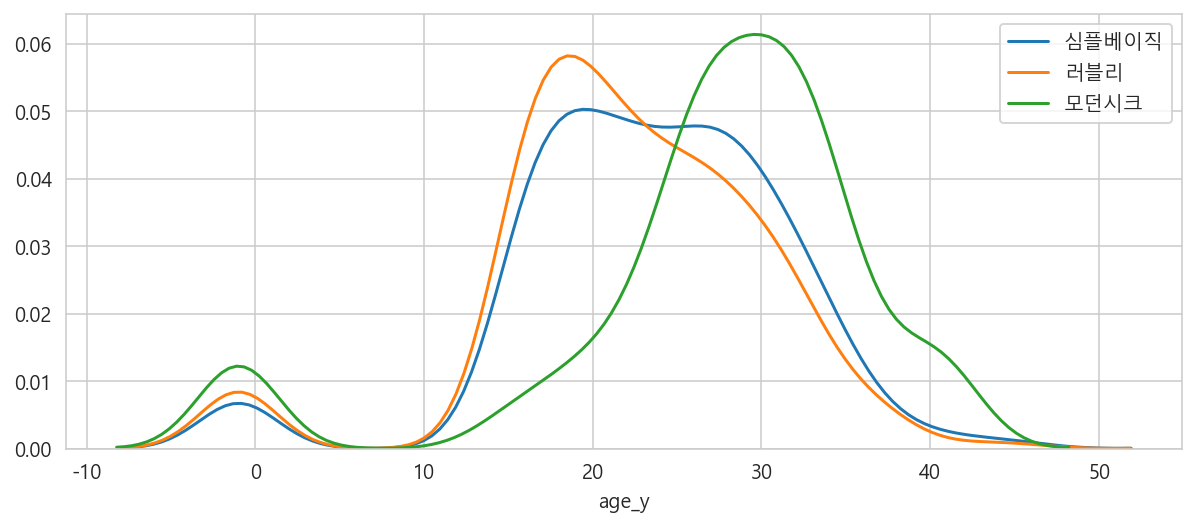

In [111]:
#Write your code here!
plt.figure(figsize=(10,4))
sns.distplot(merged.loc[merged["심플베이직"]==True, "age_y"],label = "심플베이직", hist=False)
sns.distplot(merged.loc[merged["러블리"]==True, "age_y"],label = "러블리", hist=False)
sns.distplot(merged.loc[merged["모던시크"]==True, "age_y"],label = "모던시크", hist=False)

**10. DB에서 로그 데이터를 불러온 다음 timestamp 컬럼을 datetime 형식으로 바꿔주세요. 그리고 user id를 보기 쉽게 간단한 자연수 형태로 변환해주세요.**

In [113]:
#Write your code here!
query = "SELECT * FROM 'log'"

log = pd.read_sql(query, connect)
log.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [114]:
log["timestamp"] = pd.to_datetime(log["timestamp"])
log["timestamp"].head(1)

0   2018-06-11 00:00:00.213
Name: timestamp, dtype: datetime64[ns]

지그재그 로그 데이터의 명세는 다음과 같습니다.


    - 컬럼 별 명세
        1. timestamp : 이벤트 발생 시간 (한국 시간 기준)
        2. user_id : 이용자 고유 식별자
        3. event_origin : 이벤트가 발생한 앱 위치
            - event_origin 값 별 의미
                a. goods_search_result : 특정 검색어의 상품 검색 결과
                    (Ex: goods_search_result/반팔티)
                b. shops_ranking : '쇼핑몰 랭킹' 영역
                c. shops_bookmark : '즐겨찾기' 영역
                d. category_search_result : 카테고리 검색 결과 
                    (Ex:category_search_result/상의)
                e. my_goods : '내 상품' 영역
                
        4. event_name : 발생한 이벤트 명
            - event_name 값 별 의미
                a. app_page_view : 앱 내 화면 이동
                b. enter_browser : 앱 내 클릭을 통해, 특정 웹페이지로 진입
                c. add_bookmark : 특정 쇼핑몰을 즐겨찾기 추가
                d. remove_bookmark : 특정 쇼핑몰을 즐겨찾기 제거
                e. add_my_goods : 특정 상품을 내 상품 추가
                f. remove_my_goods : 특정 상품을 내 상품 제거
                
        5. event_goods_id : 이벤트가 발생한 상품 고유 식별자
             - 상품 관련 이벤트가 아닌 경우, 공백
             
        6. event_shop_id : 이벤트가 발생한 쇼핑몰 고유 식별자
             - 쇼핑몰 관련 이벤트가 아닌 경우, 공백



user_id는 아래에서 확인할 수 있듯이 매우 복잡한 형태로 되어 있어 한눈에 파악하기 어렵습니다.


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>And</td>
      <td>41</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>iOS</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN</td>
      <td>iOS</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1</td>
      <td>And</td>
      <td>41</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k</td>
      <td>And</td>
      <td>42</td>
    </tr>
  </tbody>
</table>




앞으로의 분석을 용이하게 하기위하여 user_id을 간단하게 0, 1, 2, 3 ...과 같이 연속된 정수 형태로 아래와 같이 변환하겠습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>n_user_id</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>3314</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3</td>
      <td>7844</td>
    </tr>
    <tr>
      <th>2</th>
      <td>mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8</td>
      <td>7920</td>
    </tr>
    <tr>
      <th>3</th>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>3314</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Yjny5AchUWLiuv4kdeq50COF-S8OFXPd</td>
      <td>5608</td>
    </tr>
    <tr>
      <th>5</th>
      <td>LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl</td>
      <td>3548</td>
    </tr>
    <tr>
      <th>6</th>
      <td>TUoAGIbbNds5cYLZLnz-R5VlkG5L8RuZ</td>
      <td>4790</td>
    </tr>
    <tr>
      <th>7</th>
      <td>B9F_BHH9F3b6MW329go9jDr71Uunx629</td>
      <td>1902</td>
    </tr>
    <tr>
      <th>8</th>
      <td>e_xrTZ9fHVodxxadLx688qUKMWCdL8bW</td>
      <td>6663</td>
    </tr>
    <tr>
      <th>9</th>
      <td>aA9S7LxnFm6ym6IUEa-4SSxJa-iL5m2J</td>
      <td>5976</td>
    </tr>
  </tbody>
</table>

기존의 고객 아이디와 새롭게 만들 고객 아이디를 짝지어 딕셔너리로 만들고 이를 mapping하여 진행을 할 것입니다.

In [116]:
# 판다스의 unique() 기능을 이용하여 유저 아이디를 user_id라는 변수에 저장합니다.
user_id = user["user_id"].unique()
# Write your code here!
user_id

array(['--PYPMX8QWg0ioT5zfORmU-S5Lln0lot',
       '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv',
       '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', ...,
       'zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs',
       'zznj-LHhddVvuzZmbZpw6MSylLO64982',
       'zzxBQ7i7mttX0cv1GqFuuMstg7keEkdV'], dtype=object)

In [120]:
#새로운 user_id는 연속된 자연수들로 지정합니다. range()와 len()을 사용하여 user_id의 개수만큼의 연속된 정수를 만듭니다.
n_user_id = range(user["user_id"].size)
# Write your code here!
n_user_id

range(0, 10000)

In [121]:
#python 내장 함수인 zip()을 이용하여 기존의 id와 새로운 id를 묶습니다.
id_zip = zip(user_id, n_user_id)

#id_zip을 출력하면 아래 결과와 같이 zip object이 출력됩니다.
print(id_zip)

In [122]:
#zip()의 결과를 구체적으로 보기 위하여 list로 변환하여 print하겠습니다. 상위 5개만 출력합니다.
list(zip(user_id, n_user_id))[:5]


[('--PYPMX8QWg0ioT5zfORmU-S5Lln0lot', 0),
 ('-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv', 1),
 ('-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN', 2),
 ('-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1', 3),
 ('-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k', 4)]

In [123]:
#새로운 id와 기존의 id가 대응된 딕셔너리 타입 변수를 생성합니다.
id_dict = dict(id_zip)

id_dict

{'--PYPMX8QWg0ioT5zfORmU-S5Lln0lot': 0,
 '-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv': 1,
 '-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN': 2,
 '-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1': 3,
 '-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k': 4,
 '-3fmY1WsLkYJwN_8lZQMmxZd6zJTAcT1': 5,
 '-3q-oynqxFEgSHUwX802hpmi1louyQNv': 6,
 '-428TMckUlhn6ptxN7gR2FGaSyXjSnaD': 7,
 '-4O8WnD8dT6nWho-4KbIm6TvnK4BmjX_': 8,
 '-4ltLPS55n6J2wSUCLxEZwxYdeW37cK5': 9,
 '-5BA0EwkyhGLCC8FxzvvDgyrZWYJM33I': 10,
 '-5Cwn2Fcx9j16QSM2-SLiaLMm0sS4E2I': 11,
 '-5o3lkvJctT3uURb5JWPVxe1VjqhyzAi': 12,
 '-622WUNWBtjX5VGKx8UnOtn2NVHD_NaB': 13,
 '-62U2A3KHjNZ2XXmOgQTSWEfPg1RRWWy': 14,
 '-63J8veARgGL3ulnRKblm4xhhwkvjKzG': 15,
 '-6UZWGgl3AAI7Df2sVWLX6oT6zP43zo0': 16,
 '-6jxyh56lSivkbLm3WNGRCmdyrdsBmNW': 17,
 '-71z4lG_D-eKnOmDCJlUaNvVcwd808yw': 18,
 '-75tFsDSoUwapUvwCUHTZiGTGkaSDleQ': 19,
 '-7SKUZkBmbG2ZMvJ0E0jmMDcd8PgmARb': 20,
 '-7uBbvfy4gff6mHV9XotjVO2YlCY2r8v': 21,
 '-8htVW7UIA8qRupSdCx-6PzIXLI_vk2p': 22,
 '-9qbSavSdufdw9JwmiWX1_URT2E2QxFZ': 23,
 '-Ae6T8G5uAZldwUEOTMR-KzG

mapping 후 data_logs user_id, n_user_id 결과는 아래와 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user_id</th>
      <th>n_user_id</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>3314</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3</td>
      <td>7844</td>
    </tr>
    <tr>
      <th>2</th>
      <td>mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8</td>
      <td>7920</td>
    </tr>
    <tr>
      <th>3</th>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>3314</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Yjny5AchUWLiuv4kdeq50COF-S8OFXPd</td>
      <td>5608</td>
    </tr>
  </tbody>
</table>



**Hint) mapping 예시**

```
data['column'].map(dict)
```

In [125]:
# data_logs, order, user에 id_idct를 mapping하여 각 데이터 프레임에 새로운 고객 id컬럼인 n_user_id를 만듭니다.
log["n_user_id"] = log["user_id"].map(id_dict)
order["n_user_id"] = order["user_id"].map(id_dict)
user["n_user_id"] = user["user_id"].map(id_dict)

# Write your code here! (3 lines)


# 결과를 확인합니다.
log[['user_id', 'n_user_id']].head()

,user_id,n_user_id
0,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
1,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,7844
2,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,7920
3,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,3314
4,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,5608


 **12. 주문 데이터, 로그 데이터를 concat해주세요.**

주문기록은 user_event_log에 기록되지 않습니다. 이는 바로 뒤에서 확인할 수 있습니다. 이를 확인하고 concat해야 되는 이유를 살펴보겠습니다.

In [126]:
#주문 데이터의 첫번째 row를 출력합니다.
order.iloc[0]

timestamp          2018-06-11 00:00:43.032000
user_id      bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx
goods_id                                 1414
shop_id                                    38
price                                   45000
hour                                        0
n_user_id                                6241
Name: 0, dtype: object

위의 user_id에 해당하는 고객의 log기록을 가져와주세요. 결과는 아래와 같습니다. 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>event_origin</th>
      <th>event_name</th>
      <th>event_goods_id</th>
      <th>event_shop_id</th>
      <th>n_user_id</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>878</th>
      <td>2018-06-11 00:06:45.357</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>901</th>
      <td>2018-06-11 00:06:54.034</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1062</th>
      <td>2018-06-11 00:08:00.579</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>enter_browser</td>
      <td>2048.0</td>
      <td>46.0</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1259</th>
      <td>2018-06-11 00:09:38.881</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1439</th>
      <td>2018-06-11 00:11:04.446</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>enter_browser</td>
      <td>3486.0</td>
      <td>38.0</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1473</th>
      <td>2018-06-11 00:11:20.354</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>1526</th>
      <td>2018-06-11 00:11:48.284</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>enter_browser</td>
      <td>4006.0</td>
      <td>24.0</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>2423</th>
      <td>2018-06-11 00:18:21.906</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨바지</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>2529</th>
      <td>2018-06-11 00:19:01.928</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>goods_search_result/린넨</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>2758</th>
      <td>2018-06-11 00:20:30.432</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>shops_bookmark</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>4502</th>
      <td>2018-06-11 00:32:29.738</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>shops_bookmark</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
    <tr>
      <th>5156</th>
      <td>2018-06-11 00:37:22.757</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>shops_bookmark</td>
      <td>app_page_view</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6241</td>
    </tr>
  </tbody>
</table>

In [129]:
# Write your code here!
log[log["user_id"] == "bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx"]

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,n_user_id
878,2018-06-11 00:06:45.357,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
901,2018-06-11 00:06:54.034,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1062,2018-06-11 00:08:00.579,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,2048.0,46.0,6241
1259,2018-06-11 00:09:38.881,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1439,2018-06-11 00:11:04.446,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,3486.0,38.0,6241
1473,2018-06-11 00:11:20.354,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
1526,2018-06-11 00:11:48.284,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,enter_browser,4006.0,24.0,6241
2423,2018-06-11 00:18:21.906,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨바지,app_page_view,NaN,NaN,6241
2529,2018-06-11 00:19:01.928,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,goods_search_result/린넨,app_page_view,NaN,NaN,6241
2758,2018-06-11 00:20:30.432,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,shops_bookmark,app_page_view,NaN,NaN,6241


00시 37분에 마지막 log가 기록되어 있습니다. 이 기록을 바탕으로 해당 고객은 쇼핑몰 즐겨찾기 목록에서 특정 쇼핑몰을 클릭하여 들어간다음 43분에 린넨바지를 구매한 것을 유추할 수 있습니다. 

logs 테이블에 존재하는 기록들은 위와 같이 기록이 되어 있습니다. 사람들이 구매를 하도록 유도하는 것이 최종 목표이기 때문에, 로그기록과 구매기록을 연결하는 것은 매우 중요합니다. 하지만, 로그 테이블에는 이 사람이 구매를 했는지에 대한 정보가 전혀 없기 때문에 order 테이블과 log 테이블을 병합해야할 필요가 있습니다. 이를 `pd.concat()` 을 이용하여 병합하도록 하겠습니다.

기록 중에, 주문을 했지만 그 전의 로그 정보가 전혀 없는 고객들이 있습니다. 시간 대를 살펴봤을 때, 이들은 전날에 로그 기록이 존재하고 6월 11일 자정 이후 결제를 한 것으로 추론됩니다. 이들은 잔존 시간을 계산하는데 오류를 일으키므로 이들을 제외하고 concat 하도록 하겠습니다.

로그 데이터와 주문 데이터에 동시에 기록된 고객을 구하겠습니다.

데이터를 집합(set)으로 변환하면 중복된 원소들은 1개만 남고 제거됩니다. unique() 메서드의 결과와 같다고 생각하시면 됩니다. 이를 이용하겠습니다.
 
코드예시는 아래와 같습니다. 아래의 예시를 활용해 주세요.

```
#집합 타입으로 변환하는 코드입니다.
set(data['column'])

#집합의 원소의 개수를 반환하는 코드입니다.
len(set(data['column']))

#두 집합의 공통된 원소들의 집합을 반환하는 코드입니다.
set(data1['column']) & set(data2['column'])
```


아래 코드를 실행할 시 출력 결과는 다음과 같이 나오게 됩니다.
```
해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명
```

In [130]:
order["user_id"].unique()

array(['bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx',
       'smDmRnykg61KajpxXKzQ0oNkrh2nuSBj',
       'EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P',
       'KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3',
       'lq1Je3voA3a0MouSFba3629lKCvweI24',
       'GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1',
       'lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ',
       'LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl',
       'Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ',
       '_t38UxRGHDKAsgc7nJhxz0e7q3pIj-RD',
       '2eb5qysY4MRSlB4wy9N6ZsfNffmvyoKY',
       '3LGSst6B7iam6ua5uoPG_D43HkkIGY0v',
       'OTgwvtiSLDoWj5gqc5k7oTQ4EJ19bpuj',
       '1htAKqqU-G6Cqwhl1AQZdrcqm9i-xhn7',
       'hZrcB-RV5EqL94ysDGcrQ1TZKlhSeS7L',
       'qyHhjqtMFu8B7lG1OKT39sj1J6RJNGeZ',
       'ejnC07Ro8itd1n2oCegwOIdrgoF8hT0O',
       '45TmDQuhC0bjgTIsSStEj6ttHdgF_jOr',
       'B3yaMZ62HOH0shQOKjo4QPV6PLcobUsT',
       '-L2Awbp23c9b1o1R_do--BZEtPivAUua',
       '3ntrLPHn8Xu0IsVQ1z00T2g1FnaJG6jf',
       'R6PmigLc669neah2MZxxbIEWsTpEoww0',
       'XZcG-8HyZc10O7JvFYklwdrUZGTbCoi1',
       'Vz_

In [133]:
# set()을 사용하여 user_id컬럼을 집합 타입으로 변환후 원소 개수를 반환하여 변수에 저장해주세요.
user_set = set(order["user_id"])

# 주문한 고객의 수를 user_number_order란 변수에 저장해주세요.

user_number_order = len(user_set)

# log에 기록된 고객의 수를 user_number_log란 변수에 저장해주세요.
log_set = set(log["user_id"])

user_number_log = len(log_set)


# 중복된 고객들을 user_duplicated란 변수에 저장해주세요.

user_duplicated = user_set & log_set


# 결과를 출력합니다.
print('해당 날짜에 구매한 총 고객수 입니다 :',user_number_order, end ='명\n')
print('해당 날짜 log데이터에 기록된 총 고객수입니다 :',user_number_log,  end ='명\n')
print('중복되는 고객수입니다 :', len(user_duplicated) , end ='명\n')

해당 날짜에 구매한 총 고객수 입니다 : 832명
해당 날짜 log데이터에 기록된 총 고객수입니다 : 9909명
중복되는 고객수입니다 : 742명


중복되는 고객의 목록을 구하였으므로 이제는 두 데이터들을 concat하기 위해 column명을 동일하게 맞추겠습니다.

order, data_logs의 column을 확인합니다.

In [135]:
print(order.columns)
print(log.columns)

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'n_user_id'],
      dtype='object')
Index(['timestamp', 'user_id', 'event_origin', 'event_name', 'event_goods_id',
       'event_shop_id', 'n_user_id'],
      dtype='object')


data_logs의 columns을 기준으로 병합할 것입니다. 따라서 order의 columns을 data_logs에 맞춰 변형합니다.

In [136]:
# order 원본을 변형하지 않기 위해 order을 copy하여 사용합니다. 
order_copy = order.copy()

In [137]:
# 겹치는 유저만으로 data를 indexing합니다. user_duplicated 이용합니다. 
# isin을 이용한 indexing은 뒤의 문제에서도 많이 나오기 때문에 유심히 봐두시면 유용합니다.
order_copy = order_copy[order_copy['user_id'].isin(user_duplicated)]

#  event_origin 컬럼에는 shop_id 컬럼을 저장합니다.
order_copy['event_origin'] = order_copy['shop_id']

#  event_name 컬럼에는 'purchase'를 저장합니다.
order_copy['event_name'] = 'purchase'

# event_goods_id 컬럼에는 good_id 컬럼를 저장합니다.
order_copy['event_goods_id'] = order_copy['goods_id']

# 사용할 columns를 설정합니다.
order_copy = order_copy[['timestamp', 'n_user_id', 'user_id','event_origin',
         'event_name', 'event_goods_id', 'price']]

order_copy.head()


,timestamp,n_user_id,user_id,event_origin,event_name,event_goods_id,price
0,2018-06-11 00:00:43.032,6241,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,38,purchase,1414,45000
1,2018-06-11 00:02:33.763,8899,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,12,purchase,1351,9500
4,2018-06-11 00:05:26.010,7832,lq1Je3voA3a0MouSFba3629lKCvweI24,89,purchase,5572,29000
5,2018-06-11 00:05:35.182,2745,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,22,purchase,55,11200
6,2018-06-11 00:06:14.314,7800,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,22,purchase,2451,19800


In [140]:
# data_logs, order_copy를 concat 해주하여 다시 log_order에 저장해주세요.
data_log_concated = pd.concat([log, order_copy])
print(data_log_concated.shape)
# Write your code here!

(106587, 8)


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [141]:
data_log_concated.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id
0,NaN,app_page_view,shops_ranking,NaN,3314,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo
1,NaN,app_page_view,shops_bookmark,NaN,7844,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3
2,NaN,app_page_view,goods_search_result/로브,NaN,7920,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8
3,NaN,app_page_view,shops_bookmark,NaN,3314,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo
4,NaN,app_page_view,shops_bookmark,NaN,5608,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd


----

 log_order에 구매기록여부 컬럼인 purchase 컬럼을 만들어주세요.
 
 price컬럼과 notnull()을 이용해주세요. 
 
 출력 결과는 아래와 같습니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>event_goods_id</th>
      <th>event_name</th>
      <th>event_origin</th>
      <th>event_shop_id</th>
      <th>n_user_id</th>
      <th>price</th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>purchase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_ranking</td>
      <td>NaN</td>
      <td>3314</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:00.213</td>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>7844</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:00.810</td>
      <td>lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>goods_search_result/로브</td>
      <td>NaN</td>
      <td>7920</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:00.956</td>
      <td>mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>3314</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:01.084</td>
      <td>K1d8_t3-QIskaSkrx32oAFu856D8JmLo</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>5608</td>
      <td>NaN</td>
      <td>2018-06-11 00:00:01.561</td>
      <td>Yjny5AchUWLiuv4kdeq50COF-S8OFXPd</td>
      <td>False</td>
    </tr>
  </tbody>
</table>


In [143]:
# Write your code here!
data_log_concated["purchase"] = data_log_concated["price"].notnull()
data_log_concated.head()

,event_goods_id,event_name,event_origin,event_shop_id,n_user_id,price,timestamp,user_id,purchase
0,NaN,app_page_view,shops_ranking,NaN,3314,NaN,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
1,NaN,app_page_view,shops_bookmark,NaN,7844,NaN,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,False
2,NaN,app_page_view,goods_search_result/로브,NaN,7920,NaN,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,False
3,NaN,app_page_view,shops_bookmark,NaN,3314,NaN,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,False
4,NaN,app_page_view,shops_bookmark,NaN,5608,NaN,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,False


----

데이터를 파악하기 쉽게 하기 위해 user_id, timestamp 컬럼을 기준으로 log_order를 정렬해주세요.

sort_values()를 사용해주시고 reset_index()를 통해 index를 정리해주세요.

출력 결과는 아래와 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>event_goods_id</th>
      <th>event_name</th>
      <th>event_origin</th>
      <th>event_shop_id</th>
      <th>n_user_id</th>
      <th>price</th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>purchase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>0</td>
      <td>NaN</td>
      <td>2018-06-11 15:57:10.615</td>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>0</td>
      <td>NaN</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>my_goods</td>
      <td>NaN</td>
      <td>1</td>
      <td>NaN</td>
      <td>2018-06-11 00:55:37.309</td>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2506.0</td>
      <td>enter_browser</td>
      <td>my_goods</td>
      <td>40.0</td>
      <td>1</td>
      <td>NaN</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>my_goods</td>
      <td>NaN</td>
      <td>1</td>
      <td>NaN</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>False</td>
    </tr>
  </tbody>
</table>


In [8]:
# Write your code here!

**13. 동일한 사용자에 대한 연속한 로그들 사이의 시간 간격을 구해주세요.**

고객별 연속한 log사이의 시간 간격을 log duration으로 정의합니다. 이는 고객의 잔존시간을 구하는 것으로 연결됩니다.

현재 제공된 데이터에서는 고객이 앱을 종료하는 기록이 없기 때문에 마지막 log의 log_duration은 0이라고 가정을 합니다.

In [ ]:
# 우선, timestamp 컬럼를 datetime 타입으로 변환해주세요.

# Write your code here!

----

이번에는 timestamp_after 컬럼을 만들어줍니다. timestamp_after 컬럼은 다음 log의 timestamp값을 가집니다.

고객별로 groupby()한 뒤 shift(-1)을 적용한 결과를 timestamp_afterdp 저장합니다. 

groupby를 하고 shift를 하면 고객의 당일 마지막 로그의 timestamp_after은 NaT(Not a Time)값을 갖게 됩니다.

결과는 아래와 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>event_goods_id</th>
      <th>event_name</th>
      <th>event_origin</th>
      <th>event_shop_id</th>
      <th>n_user_id</th>
      <th>price</th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>purchase</th>
      <th>timestamp_after</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>0</td>
      <td>NaN</td>
      <td>2018-06-11 15:57:10.615</td>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>False</td>
      <td>2018-06-11 15:59:05.505</td>
    </tr>
    <tr>
      <th>1</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>shops_bookmark</td>
      <td>NaN</td>
      <td>0</td>
      <td>NaN</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>--PYPMX8QWg0ioT5zfORmU-S5Lln0lot</td>
      <td>False</td>
      <td>NaT</td>
    </tr>
    <tr>
      <th>2</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>my_goods</td>
      <td>NaN</td>
      <td>1</td>
      <td>NaN</td>
      <td>2018-06-11 00:55:37.309</td>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>False</td>
      <td>2018-06-11 00:55:44.430</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2506.0</td>
      <td>enter_browser</td>
      <td>my_goods</td>
      <td>40.0</td>
      <td>1</td>
      <td>NaN</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>False</td>
      <td>2018-06-11 01:00:33.295</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NaN</td>
      <td>app_page_view</td>
      <td>my_goods</td>
      <td>NaN</td>
      <td>1</td>
      <td>NaN</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv</td>
      <td>False</td>
      <td>2018-06-11 01:11:03.608</td>
    </tr>
  </tbody>
</table>

In [ ]:
# timestamp_after 컬럼을 다음과 같이 만듭니다.
log_order['timestamp_after'] = log_order.groupby(['n_user_id'])['timestamp'].shift(-1)

log_order.head()

timestamp_after과 timestamp의 차이를 계산하여 log_duration을 구합니다. NaT 값은 연산시 NaN값이 됩니다. 이후에 NaN값을 0으로 채워주시면 됩니다.

----


log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.

출려 결과는 아래와 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>timestamp_after</th>
      <th>log_duration</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 15:57:10.615</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>00:01:54.890000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 15:59:05.505</td>
      <td>NaT</td>
      <td>00:00:00</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:55:37.309</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>00:00:07.121000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:55:44.430</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>00:04:48.865000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 01:00:33.295</td>
      <td>2018-06-11 01:11:03.608</td>
      <td>00:10:30.313000</td>
    </tr>
  </tbody>
</table>



In [ ]:
# log_duration을 계산하고 nan값(마지막 로그)는 0으로 채워 log_duration 컬럼에 저장합니다.

# Write your code here!

log_order[['timestamp','timestamp_after','log_duration']].head()

----

분석의 편의를 위하여 map()과 total_seconds() 메서드를 이용하여 log_duration을 초로 환산해주세요.

마지막으로, 이 후의 계산을 위해 astype() 메서드를 이용하여 log_duration 컬럼을 float으로 변환해주세요.  



출력 결과는 아래와 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>n_user_id</th>
      <th>timestamp</th>
      <th>timestamp_after</th>
      <th>log_duration</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>2018-06-11 15:57:10.615</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>114.890</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>NaT</td>
      <td>0.000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>2018-06-11 00:55:37.309</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>7.121</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>288.865</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>2018-06-11 01:11:03.608</td>
      <td>630.313</td>
    </tr>
  </tbody>
</table>



In [8]:
# Write your code here!

**14. 고객이 한 번 앱에 들어와서 활동하는 시간인 잔존시간을 구하기 위해 cycle을 정의해주세요.**

고객이 한번 app에 접속하여 나가기까지의 일련의 활동을 한 cycle이라 정의하겠습니다.

cycle을 구하기 위해서 고객이 cycle을 종료하고 앱을 나갔는지 여부(boolean)인 is_out이라는 컬럼을 만듭니다. is_out의 조건은 아래와 같이 2가지가 있습니다.

    조건 1) log_duration이 0이면 고객의 당일 마지막 log입니다.
    
    조건 2) log간 간격이 40분이상이면 고객이 한 cycle이 종료하고 다음 cycle로 돌아온 것이라고 하겠습니다.

    
   

따라서 위의 조건중 적어도 1개를 만족시키면 True되도록 is_out 컬럼을 생성해주세요. 





출력 결과는 아래와 같습니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>n_user_id</th>
      <th>timestamp</th>
      <th>timestamp_after</th>
      <th>log_duration</th>
      <th>is_out</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>2018-06-11 15:57:10.615</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>114.890</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>NaT</td>
      <td>0.000</td>
      <td>True</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>2018-06-11 00:55:37.309</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>7.121</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>288.865</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>2018-06-11 01:11:03.608</td>
      <td>630.313</td>
      <td>False</td>
    </tr>
  </tbody>
</table>




In [1]:
# 40분을 초로 환산해야 합니다.
# Write your code here!

log_duration이 2400이상 또는 음수인 log들은 cycle의 마지막 log입니다. 예를 들어, log_duration이 36000인 log가 있으면 이는 10시간 뒤에 다시 app에 접속한다는 것을 의미하지 실제 10시간 동안 앱을 사용했다는 의미가 아닙니다. 따라서 특정 사람에 대한 해당 logs는 해당 cycle의 마지막 log가 되고 다음 log는 10시간 뒤인 다음 cycle의 첫 log가 됩니다.

즉, 위의 조건들을 만족하는 log들의 log_duration은 0이 되도록 변환해주어야 합니다.
is_out 컬럼이 True인 log_duration을 0으로 지정해주세요.

출력 결과는 아래와 같습니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>n_user_id</th>
      <th>timestamp</th>
      <th>timestamp_after</th>
      <th>log_duration</th>
      <th>is_out</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>2018-06-11 15:57:10.615</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>114.890</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>2018-06-11 15:59:05.505</td>
      <td>NaT</td>
      <td>0.000</td>
      <td>True</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>2018-06-11 00:55:37.309</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>7.121</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>2018-06-11 00:55:44.430</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>288.865</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>2018-06-11 01:00:33.295</td>
      <td>2018-06-11 01:11:03.608</td>
      <td>630.313</td>
      <td>False</td>
    </tr>
  </tbody>
</table>




In [ ]:
# Write your code here!

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out']].head()

----

이제 cycle을 구하여 번호를 부여할 것입니다.

번호는 cycle별 고유 번호(cycle_idx_unique)와 고객별 0부터 시작하는 daily cycle 번호(cycle_idx_daily)를 부여합니다.

In [81]:
log_order['cycle_idx_unique'] = (log_order['is_out']
                                 .cumsum()
                                 .shift(1)
                                 .fillna(0)
                                 .astype(int)
                                )

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out', 'cycle_idx_unique']].head(5)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,1
9,2,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,0.000,True,2


이번엔 daily cycle 번호를 부여하겠습니다.

In [82]:
log_order['cycle_idx_daily'] = (log_order.groupby('n_user_id')['is_out']
                                           .cumsum()
                                           .shift(1)
                                           .fillna(0)
                                           .astype(int)
                                            )

# user마다 첫 cycle_idx_daily가 1로 되어있기 때문에 이를 0으로 바꿔줍니다.
head_index = log_order.groupby('n_user_id')['cycle_idx_daily'].head(1).index
log_order.loc[head_index, 'cycle_idx_daily'] = 0

log_order[['n_user_id','timestamp', 'timestamp_after', 'log_duration', 'is_out','cycle_idx_daily']].head(30)

,n_user_id,timestamp,timestamp_after,log_duration,is_out,cycle_idx_daily,cycle_idx_unique
0,0,2018-06-11 15:57:10.615,2018-06-11 15:59:05.505,114.890,False,0,0
1,0,2018-06-11 15:59:05.505,NaT,0.000,True,0,0
2,1,2018-06-11 00:55:37.309,2018-06-11 00:55:44.430,7.121,False,0,1
3,1,2018-06-11 00:55:44.430,2018-06-11 01:00:33.295,288.865,False,0,1
4,1,2018-06-11 01:00:33.295,2018-06-11 01:11:03.608,630.313,False,0,1
5,1,2018-06-11 01:11:03.608,2018-06-11 01:11:05.713,2.105,False,0,1
6,1,2018-06-11 01:11:05.713,2018-06-11 01:12:09.565,63.852,False,0,1
7,1,2018-06-11 01:12:09.565,2018-06-11 01:12:28.850,19.285,False,0,1
8,1,2018-06-11 01:12:28.850,NaT,0.000,True,0,1
9,2,2018-06-11 23:19:11.439,2018-06-11 02:21:04.848,0.000,True,0,2


이번엔 cycle을 이용한 분석을 해보겠습니다.

**cycle별 log 수(접속별 활동 개수)**, **user별 cycle당 평균 log수(고객별 접속당 평균 활동수)**을 구하겠습니다.

**cycle별 log 수**는 코드는 아래와 같습니다.

이를 활용하여 `user별 cycle별 평균 log수`를 구해주세요.

**14.1) cycle별 log 수(접속별 활동 개수)**

In [83]:
cycle_log_count = (log_order
                 .groupby(['n_user_id', 'cycle_idx_daily']) 
                 .size()  # 그룹별 속한 row 수(log 수)를 반환합니다.
                 .reset_index()  # index를 초기화합니다.
                 .rename(columns = { 0 : "log_count"} )   # 컬럼이름을 log_count로 변경합니다.
                )

cycle_log_count.head(5)

,n_user_id,cycle_idx_daily,log_count
0,0,0,2
1,1,0,7
2,2,0,1
3,2,1,13
4,2,2,4
5,2,3,30
6,3,0,1
7,3,4,6
8,3,5,3
9,3,6,21


**14.2) user별 cycle당 평균 log수의 평균(고객별 접속당 평균 활동수)**

위에서 구한 cycle_log_count를 이용하여 user별 cycle당 평균 log수를 구해주세요.

출력 결과는 아래와 같습니다.
<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>n_user_id</th>      <th>log_count_mean</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0</td>      <td>2.00</td>    </tr>    <tr>      <th>1</th>      <td>1</td>      <td>7.00</td>    </tr>    <tr>      <th>2</th>      <td>2</td>      <td>16.00</td>    </tr>    <tr>      <th>3</th>      <td>3</td>      <td>7.75</td>    </tr>    <tr>      <th>4</th>      <td>4</td>      <td>2.00</td>    </tr>  </tbody></table>

In [ ]:
# Write your code here!

cycle_user_log_count.head()

**14.3) 하루동안 가장 많은 cycle을 갖는(가장 많이 활동한) 상위 5명의 user를 구해주세요.**

`Hint) groupby(), nunique(), sort_values 메서드`

결과는 아래와 같습니다. 순서는 상관 없습니다.

```
n_user_id
6234     9
2424     9
2249    10
6010    10
5847    11
```

In [ ]:
# Write your code here!

**15. 잔존시간을 구해주세요**

잔존시간이란 고객이 앱에서 머문 시간을 뜻합니다.



잔존 시간이 높다는 것은 사이트 운영의 청신호라고 생각할 수 있습니다. 일단 방문 목적과 랜딩페이지에서 제공되는 컨텐츠가 부합한다는 뜻이며, 웹사이트의 컨텐츠에 흥미를 느낀 방문자들이 계속 머물고 있다는 뜻이기도 합니다. 방문자들이 웹사이트에 오랜 시간 머물게 되면 웹사이트에서 제공하는 다양한 장치들을 접할 기회가 많아지고 전환에 도달할 확률이 더욱 높아지기 때문에 체류시간은 전환에 있어 매우 중요한 요소입니다.
광고를 고객을 통해 app으로의 유입을 성공해다면 그 다음 목표는 방문자를 계속 머물게 하여 전환으로 이어질 수 있도록 하는 것입니다.

해당 수업의 zigzag 데이터는 짧은 시간의 제한된 데이터라 잔존 시간을 이용하여 분석할 수 있는게 많지 않지만 현업에서는 잔존 시간을 이용하여 통해 어떤 채널을 이용한 고객 또는 어떤 광고를 통해 유입된 고객이 웹사이트/app에 오래 머물고 제품을 구매하는지에 대한 분석 또는 시간대/요일별 노출전략을 세우는 등 다양한 insight를 얻을 수 있습니다.



두가지 기준으로 잔존시간을 구할 것입니다.

    1) user별
    2) 구매 user/ 비구매 user

**15.1) user별 잔존시간을 구해주세요**



먼저 cycle별 잔존시간을 다음과 같이 구합니다.

In [ ]:
remaining_time_cycle = (log_order.groupby(['n_user_id', 'cycle_idx_daily'])['log_duration']
                         .sum()
                         .reset_index()
                         .rename(columns = {'log_duration' : 'remaining_time'})
                       )

remaining_time_cycle.head(10)


remaining_time_cycle을 이용하여 user별 잔존시간을 구해주세요.

Hint) groupby(), mean() 메서드

결과는 아래와 같습니다.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>duration</th>    </tr>    <tr>      <th>n_user_id</th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>114.890000</td>    </tr>    <tr>      <th>1</th>      <td>1011.541000</td>    </tr>    <tr>      <th>2</th>      <td>1346.260667</td>    </tr>    <tr>      <th>3</th>      <td>460.531250</td>    </tr>    <tr>      <th>4</th>      <td>49.130000</td>    </tr>    <tr>      <th>5</th>      <td>0.000000</td>    </tr>    <tr>      <th>6</th>      <td>1791.532000</td>    </tr>    <tr>      <th>7</th>      <td>2580.258000</td>    </tr>    <tr>      <th>8</th>      <td>984.298000</td>    </tr>    <tr>      <th>9</th>      <td>1657.393000</td>    </tr>  </tbody></table>

In [11]:
# Write your code here!

잔존 시간이 0인 것들은 app에 들어와서 아무것도 안하고 나간 고객들입니다.

제외하고 계산할 수도 있습니다.

**15.2) 구매/비구매 cycle별 평균 잔존시간 구하기**

구매 기록이 있는 cycle은 잔존시간이 길 것이라고 예상할 수 있습니다. 이를 확인하기 위하여 구매/비구매 cycle별 평균 잔존시간을 구하겠습니다.

먼저 구매기록이 있는 cycle list를 만들어 주세요.

cycle_purchase 변수에 구매기록이 있는 cycle들을 저장해주시면 됩니다.

Hint) purchase 컬럼, indexing, unique() 메서드

In [88]:
cycle_purchase = # Write your code here!

---

data_purchase 변수에는 구매 기록이 있는 cycle들의 데이터를,

data_npurchase 변수에는 구매 기록이 없는 cycle들의 데이터를 저장해주세요.

Hint) isin()메서드를 이용한 indexing

In [12]:
# Write your code here!
data_purchase = log_order.loc[log_order['cycle_idx_unique'].isin(cycle_purchase)]
data_npurchase = log_order.loc[~log_order['cycle_idx_unique'].isin(cycle_purchase)]

---

data_purchase를 이용하여 구매 cycle의 잔존시간을 구해주세요.

Hint) User별 잔존시간을 구하는 방법과 매우 유사합니다. cycle_idx_unique를 이용해주세요.

결과는 아래와 같습니다.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>n_user_id</th>      <th>cycle_idx_unique</th>      <th>cycle_duration</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>2</td>      <td>4</td>      <td>3075.422</td>    </tr>    <tr>      <th>1</th>      <td>8</td>      <td>15</td>      <td>412.025</td>    </tr>    <tr>      <th>2</th>      <td>8</td>      <td>16</td>      <td>1791.231</td>    </tr>    <tr>      <th>3</th>      <td>9</td>      <td>19</td>      <td>1657.393</td>    </tr>    <tr>      <th>4</th>      <td>47</td>      <td>88</td>      <td>3116.367</td>    </tr>    <tr>      <th>5</th>      <td>49</td>      <td>92</td>      <td>2615.611</td>    </tr>    <tr>      <th>6</th>      <td>65</td>      <td>123</td>      <td>3093.858</td>    </tr>    <tr>      <th>7</th>      <td>86</td>      <td>168</td>      <td>1906.721</td>    </tr>    <tr>      <th>8</th>      <td>97</td>      <td>192</td>      <td>3031.770</td>    </tr>    <tr>      <th>9</th>      <td>117</td>      <td>232</td>      <td>1191.110</td>    </tr>  </tbody></table>

In [13]:
# Write your code here!

마찬가지로 비구매 cycle의 잔존시간을 구해주세요.

In [14]:
# Write your code here!

마지막으로 구매/비구매 cycle의 잔존 시간으로 boxplot을 그려주세요. 그리고 구매 cycle 잔존 시간 평균과 비구매 cycle 잔존 시간 평균을 구해주세요.

결과는 아래와 같습니다.

<img src="https://drive.google.com/uc?export=view&id=1Pu4__DARP88Agt9w-f9IaequPznszMVZ" width="600" height="224"></img> 


```
구매 cycle 잔존 시간 평균: 2280.0800799999997
비구매 cycle 잔존 시간 평균: 611.9902027010454
```


In [15]:
# Write your code here!

## 제출

과제를 다 끝내셨으면 http://bit.ly/ds-assignment 에서 안내에 따라 과제를 제출하여 주세요! 과제를 제출해주시면 솔루션과 검토 결과를 드립니다. 오프라인 수업의 경우 과제를 제출하지 않으시더라도 솔루션은 다음 수업 시간에 제공해드립니다.

수업이나 과제 관련 질문, 수료증 문의 등은 담당 튜터(조교)에게 문의 주세요. 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일 주시면 담당자분이 응대해주실 겁니다. 기타 궁금한 사항은 슬랙으로 문의 주세요!